# Curva ROC-AUC

Veremos agora uma outra métrica de avaliação de modelos de classificação, que é a **AUC (Area Under The Curve) da curva ROC (Receiver Operating Characteristics)**, por vezes chamada de **AUROC (Area Under the Receiver Operating Characteristics)**

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**.

Ou seja, esta medida nos diz **o quanto o modelo é capaz de distinguir entre duas classes**.

A curva ROC é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

O valor do AUC-ROC sempre estará **entre 0 e 1**, sendo que **quanto mais próximo de 1, melhor o modelo**.

> Valores de AUC-ROC maiores que 0.5 (mais próximos de 1) significam que o modelo tem uma **taxa de veridadeiros positivos maior que a taxa de falsos positivos**, ou seja, o modelo está acertando mais!

Quanto **mais próximo de 0** (para valores abaixo de 0.5), teremos um modelo que faz um bom trabalho em separar as classes, mas as classifica erroneamente.

E, quanto **mas próximo de 0.5**, pior é o modelo em separar as classes: seria um modelo que simplesmente chuta aleatoriamente ora a classe 0, ora a classe 1. Veja as imagens a seguir para uma ilustração:

<img src="https://miro.medium.com/max/528/1*Uu-t4pOotRQFoyrfqEvIEg.png" width=500>


<img src="https://miro.medium.com/max/507/1*yF8hvKR9eNfqqej2JnVKzg.png" width=500>


<img src="https://miro.medium.com/max/430/1*iLW_BrJZRI0UZSflfMrmZQ.png" width=500>


<img src="https://miro.medium.com/max/556/1*aUZ7H-Lw74KSucoLlj1pgw.png" width=500>

Ao olhar para a curva em si, temos a seguinte interpretação:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

Para ficar mais claro, aqui temos alguns exemplos de curvas...
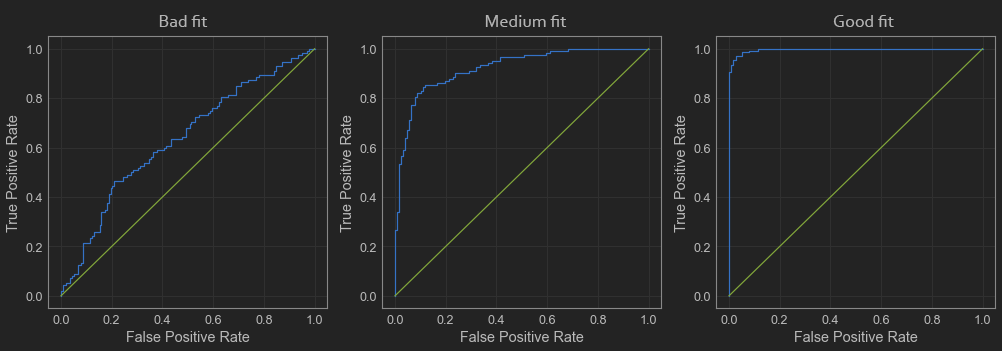

E o que representa na realidade...
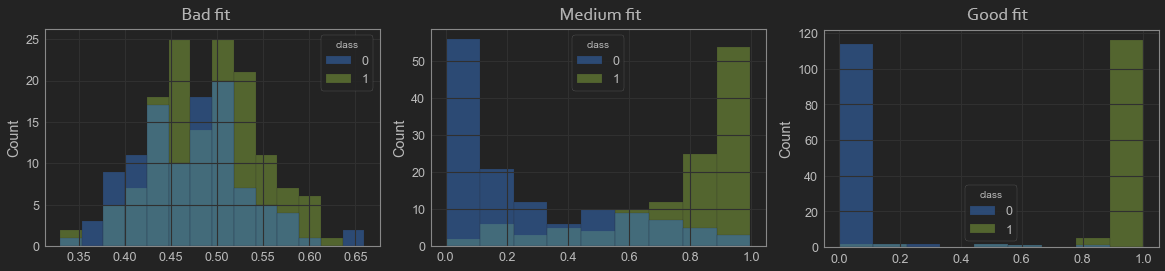

Utilizando esse score podemos comparar diferentes modelos, sejam vindo do mesmo algoritmo ou não!!!

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [5]:
# Exemplo com dataset do câncer de mama
df = pd.read_csv('./datasets/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
X = df.drop(columns = ['id', 'diagnosis'])
y = df['diagnosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

In [10]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Testando dois modelos: regressão logística e KNN
LR_model = LogisticRegression().fit(X_train_scaled, y_train)
KNN_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train_scaled, y_train)

In [12]:
# Aplicando nos dados teste
predictions = {}
predictions['LR'] = LR_model.predict(X_test_scaled)
predictions['KNN'] = KNN_model.predict(X_test_scaled)

In [13]:
print(classification_report(y_test, predictions['LR']))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [14]:
print(classification_report(y_test, predictions['KNN']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions['LR'])

0.9640771028037383

In [16]:
roc_auc_score(y_test, predictions['KNN'])

0.953125

In [19]:
# Função para plotar curva ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, thr = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr).plot()
    plt.plot([0,1], [0,1], color = 'g')
    
    return fpr, tpr, thr

In [23]:
thr

array([2, 1, 0])

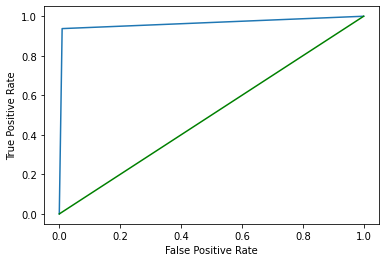

In [20]:
fpr, tpr, thr = plot_sklearn_roc_curve(y_test, predictions['LR'])

(array([0., 0., 1.]), array([0.     , 0.90625, 1.     ]), array([2, 1, 0]))

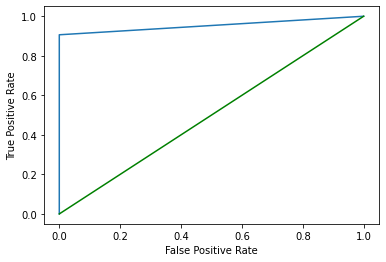

In [22]:
plot_sklearn_roc_curve(y_test, predictions['KNN'])